In [218]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [219]:
bias = fits.open("D_n20131112t1127_c13_r1472p01_biascor.fits")[0].data
flat = fits.open("D_n20131112t1127_r_c13_r1472p01_dflatcor.fits")[0].data
data = fits.open("DECam_00380036_09.fits")
img = data[0].data


In [220]:
trimmed_img = img[50:4146,56:2104].astype(np.float64)
bias_b = img[50:4146, 6:55]
bias_a = img[50:4146, 2104:2153]
trimmed_img[:, :1024] -= np.median(bias_b, axis = 1).reshape(-1,1)
trimmed_img[:, 1024:] -= np.median(bias_a, axis = 1).reshape(-1,1)
reduced = (trimmed_img - bias) /  flat
data[0].data = reduced
data.writeto('reduced.fits')

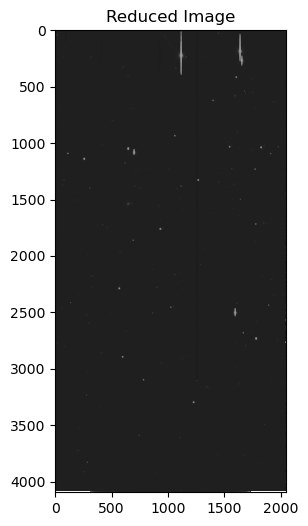

In [221]:
plt.imshow(reduced, cmap='gray', norm ='log', vmin = 100)
fig = plt.gcf()
ax = fig.gca()
fig.set_size_inches(3,6)
ax.set_title("Reduced Image")
plt.show()

The RA offset is about half an arcsecond, whereas the declination offset is about 5 arcseconds.